In [1]:
import tensorflow as tf
print(tf.__version__)

1.15.2


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
from tensorflow.keras.datasets import fashion_mnist

In [43]:
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()

In [44]:
X_train.shape,X_test.shape

((60000, 28, 28), (10000, 28, 28))

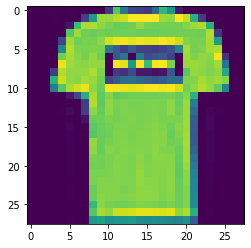

In [45]:
plt.figure()
plt.imshow(X_train[1])
plt.show()

In [46]:
class_names = ['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']
print(class_names)

['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']


In [47]:
X_train=X_train.reshape(-1,28*28)

In [48]:
X_test=X_test.reshape(-1,28*28)

In [49]:
model=tf.keras.Sequential()

In [50]:
model.add(tf.keras.layers.Dense(units=128,activation='relu',input_shape=(784,)))

In [51]:
model.add(tf.keras.layers.Dropout(0.3))

In [52]:
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [53]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.fit(X_train,y_train,epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 81us/sample - loss: 2.6623 - sparse_categorical_accuracy: 0.5449
Epoch 2/20
60000/60000 [==============================] - 5s 79us/sample - loss: 1.0825 - sparse_categorical_accuracy: 0.5930
Epoch 3/20
60000/60000 [==============================] - 5s 86us/sample - loss: 0.9978 - sparse_categorical_accuracy: 0.6243
Epoch 4/20
60000/60000 [==============================] - 6s 95us/sample - loss: 0.9931 - sparse_categorical_accuracy: 0.6303
Epoch 5/20
60000/60000 [==============================] - 5s 85us/sample - loss: 0.9568 - sparse_categorical_accuracy: 0.6418
Epoch 6/20
60000/60000 [==============================] - 5s 85us/sample - loss: 0.9294 - sparse_categorical_accuracy: 0.6542
Epoch 7/20
60000/60000 [==============================] - 5s 80us/sample - loss: 0.9155 - sparse_categorical_accuracy: 0.6620
Epoch 8/20
60000/60000 [==============================] - 5s 81us/sample - loss: 0.9166 - spars

In [31]:
test_loss,test_accuracy=model.evaluate(X_test,y_test)

10000/10000 [==============================] - 0s 43us/sample - loss: 4.9073 - sparse_categorical_accuracy: 0.1075


In [32]:
print(test_accuracy)

0.1075


In [56]:
y_pred=model.predict_classes(X_test)

In [57]:
from sklearn.metrics import confusion_matrix,accuracy_score



In [58]:
cm=confusion_matrix(y_test,y_pred)

In [59]:
print(cm)

[[942   2   0  28   6   0  17   0   5   0]
 [ 13 944   0  32   4   0   6   0   1   0]
 [133   1   0   7 616   0 243   0   0   0]
 [132  12   0 803  30   0  22   0   1   0]
 [ 37   0   0  21 853   0  88   0   1   0]
 [  2   0   0   0   0 899   0  53   4  42]
 [438   0   0  15 241   0 299   0   7   0]
 [  4   0   0   1   0  11   0 921   1  62]
 [107   0   0   4   3   1  20   2 863   0]
 [  4   0   0   0   0  12   0  22   0 962]]
